In [1]:
import warnings
warnings.filterwarnings("ignore") 

import pandas as pd
from scipy.stats import gaussian_kde
from scipy.stats.distributions import uniform
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from arff2pandas import a2p

from sklearn import preprocessing, tree, pipeline
from sklearn import pipeline 
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#import ConfigSpace
import importlib

init_notebook_mode(connected=True)

In [2]:

with open('results__2000__svc__predictive_accuracy.arff') as f:
    df = a2p.load(f)
    #print(ds)

In [3]:
df.head()
    

,"columntransformer__numeric__imputer__strategy@{median,most_frequent,mean}",predictive_accuracy@NUMERIC,svc__C@NUMERIC,svc__coef0@NUMERIC,svc__degree@NUMERIC,svc__gamma@NUMERIC,"svc__kernel@{sigmoid,poly,rbf}",svc__max_iter@{-1},"svc__shrinking@{True,False}",svc__tol@NUMERIC,task_id@NUMERIC
0,median,0.679912,4106.346087,-0.701720,NaN,0.101156,sigmoid,-1,True,0.000038,3.0
1,most_frequent,0.522215,0.059314,-0.720285,3.0,0.000250,poly,-1,True,0.006409,3.0
2,median,0.966834,15283.560563,0.908660,4.0,0.000042,poly,-1,True,0.007772,3.0
3,most_frequent,0.348561,243.663224,-0.401704,2.0,0.000641,poly,-1,False,0.001474,3.0
4,median,0.522215,32.914098,-0.486604,5.0,0.018313,poly,-1,False,0.000637,3.0


In [4]:
# Rename all the columns without the @ thing

df = df.rename(columns={col: col.split('@')[0] for col in df.columns})


In [6]:
df

,columntransformer__numeric__imputer__strategy,predictive_accuracy,svc__C,svc__coef0,svc__degree,svc__gamma,svc__kernel,svc__max_iter,svc__shrinking,svc__tol,task_id
0,median,0.679912,4106.346087,-0.701720,NaN,0.101156,sigmoid,-1,True,0.000038,3.0
1,most_frequent,0.522215,0.059314,-0.720285,3.0,0.000250,poly,-1,True,0.006409,3.0
2,median,0.966834,15283.560563,0.908660,4.0,0.000042,poly,-1,True,0.007772,3.0
3,most_frequent,0.348561,243.663224,-0.401704,2.0,0.000641,poly,-1,False,0.001474,3.0
4,median,0.522215,32.914098,-0.486604,5.0,0.018313,poly,-1,False,0.000637,3.0
5,median,0.920526,28237.139926,0.610904,NaN,0.002258,sigmoid,-1,True,0.000216,3.0
6,mean,0.522215,0.752695,NaN,NaN,0.000119,rbf,-1,False,0.084858,3.0
7,mean,0.996871,0.674183,0.548671,3.0,1.218818,poly,-1,False,0.000216,3.0
8,most_frequent,0.522215,0.031621,-0.079787,NaN,4.752625,sigmoid,-1,False,0.017666,3.0
9,mean,0.997497,8.345758,0.738553,5.0,0.621059,poly,-1,True,0.001644,3.0


In [7]:
df.dtypes

columntransformer__numeric__imputer__strategy     object
predictive_accuracy                              float64
svc__C                                           float64
svc__coef0                                       float64
svc__degree                                      float64
svc__gamma                                       float64
svc__kernel                                       object
svc__max_iter                                     object
svc__shrinking                                    object
svc__tol                                         float64
task_id                                          float64
dtype: object

In [8]:
# Sorting all rows by first task id and then performance for each task

df = df.sort_values(by = ['task_id','predictive_accuracy'], ascending=False)

In [9]:
# Casting task_id to type int

df['task_id'] = df['task_id'].astype('int64')

### Surrogate stuff

In [10]:
df.head(
)

,columntransformer__numeric__imputer__strategy,predictive_accuracy,svc__C,svc__coef0,svc__degree,svc__gamma,svc__kernel,svc__max_iter,svc__shrinking,svc__tol,task_id
82175,mean,0.972,0.052207,0.200932,1.0,3.373336,poly,-1,False,0.001316,3567
83399,median,0.972,78.184098,0.321450,NaN,0.002539,sigmoid,-1,True,0.002437,3567
82171,mean,0.970,3328.544261,0.181425,NaN,0.000057,sigmoid,-1,True,0.000060,3567
82196,most_frequent,0.970,17353.584967,-0.816073,NaN,0.000062,sigmoid,-1,True,0.089525,3567
82488,most_frequent,0.970,32004.995080,0.103676,NaN,0.003041,sigmoid,-1,False,0.017112,3567


In [11]:
df.columns

Index(['columntransformer__numeric__imputer__strategy', 'predictive_accuracy',
       'svc__C', 'svc__coef0', 'svc__degree', 'svc__gamma', 'svc__kernel',
       'svc__max_iter', 'svc__shrinking', 'svc__tol', 'task_id'],
      dtype='object')

In [12]:
# dropping max iter parameter because it is constant:

df = df[['columntransformer__numeric__imputer__strategy', 'predictive_accuracy',
       'svc__C', 'svc__coef0', 'svc__degree', 'svc__gamma', 'svc__kernel',
        'svc__shrinking', 'svc__tol', 'task_id']]

In [26]:
# Degree is not applicable for sigmoid and rbf kernels it is applicable only for polynomial kernels. 
# So we can build separate models for the 2 categories


# Setting up data and output labels here
X = df[['columntransformer__numeric__imputer__strategy', 
       'svc__C', 'svc__coef0', 'svc__degree', 'svc__gamma', 'svc__kernel',
        'svc__shrinking', 'svc__tol', ]]

y = df[['predictive_accuracy']]

In [28]:
X.head()

,columntransformer__numeric__imputer__strategy,svc__C,svc__coef0,svc__degree,svc__gamma,svc__kernel,svc__shrinking,svc__tol
82175,mean,0.052207,0.200932,1.0,3.373336,poly,False,0.001316
83399,median,78.184098,0.321450,NaN,0.002539,sigmoid,True,0.002437
82171,mean,3328.544261,0.181425,NaN,0.000057,sigmoid,True,0.000060
82196,most_frequent,17353.584967,-0.816073,NaN,0.000062,sigmoid,True,0.089525
82488,most_frequent,32004.995080,0.103676,NaN,0.003041,sigmoid,False,0.017112


In [29]:

# Converting shrinking column to binary
X['svc__shrinking'] = (X['svc__shrinking'] == 'True').astype(int)


In [30]:
X.head()

,columntransformer__numeric__imputer__strategy,svc__C,svc__coef0,svc__degree,svc__gamma,svc__kernel,svc__shrinking,svc__tol
82175,mean,0.052207,0.200932,1.0,3.373336,poly,0,0.001316
83399,median,78.184098,0.321450,NaN,0.002539,sigmoid,1,0.002437
82171,mean,3328.544261,0.181425,NaN,0.000057,sigmoid,1,0.000060
82196,most_frequent,17353.584967,-0.816073,NaN,0.000062,sigmoid,1,0.089525
82488,most_frequent,32004.995080,0.103676,NaN,0.003041,sigmoid,0,0.017112


In [31]:
# Building a surrogate for each task

In [32]:
def get_surr(df, task_no):
    
    temp_df = df[df.task_id == task_no]
    
    X = temp_df[['columntransformer__numeric__imputer__strategy', 
           'svc__C', 'svc__coef0', 'svc__degree', 'svc__gamma', 'svc__kernel',
            'svc__shrinking', 'svc__tol' ]]

    y = temp_df[['predictive_accuracy']]
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 87)
    
    nominal_indices = list(X.dtypes[X.dtypes == 'object'].index)

    numeric_indices = list(X.dtypes[X.dtypes == 'float64'].index)

    numeric_transformer = pipeline.make_pipeline(
        Imputer(),
        StandardScaler())

    # note that the dataset is encoded numerically, hence we can only impute
    # numeric values, even for the categorical columns. 
    categorical_transformer = pipeline.make_pipeline(
        #SimpleImputer(strategy='constant', fill_value=-1),
        OneHotEncoder(handle_unknown='ignore'))

    transformer = ColumnTransformer(
        transformers=[
            ('numeric', numeric_transformer, numeric_indices),
            ('nominal', categorical_transformer, nominal_indices)],
        remainder='passthrough')



    clf = pipeline.make_pipeline(transformer, VarianceThreshold(), RandomForestRegressor())


    #kde = uniform(loc=1, scale = 10)
    
    

    random_grid =   {'randomforestregressor__bootstrap': [True, False],
                     'randomforestregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                     'randomforestregressor__max_features': ['auto', 'sqrt'],
                     'randomforestregressor__min_samples_leaf': [1, 2, 4],
                     'randomforestregressor__min_samples_split': [2, 5, 10],
                     'randomforestregressor__n_estimators': [200, 400, 600, 800, 1000]}


        
    
    
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = clf, 
                                   param_distributions = random_grid, 
                                   n_iter = 20, cv = 4, verbose=2, 
                                   scoring = 'r2',
                                   random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    y_pred = rf_random.predict(X_test)
    mae = mean_absolute_error(y_pred=y_pred, y_true=y_test.values)
    score = rf_random.score(X_test, y_test)
    
    return {"rf_object": rf, "MAE": mae, "R2": score}



    
    
    
    
    
    
    
    
    

In [33]:
k = get_surr(df=df,task_no=3)

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:


NameError: name 'rf' is not defined

In [13]:
task_ids = list(df.task_id.unique())


for task_no in task_ids:
    # Setting up data and output labels here
    
    temp_df = df[df.task_id == task_no]
    
    X = temp_df[['columntransformer__numeric__imputer__strategy', 
           'svc__C', 'svc__coef0', 'svc__degree', 'svc__gamma', 'svc__kernel',
            'svc__shrinking', 'svc__tol' ]]

    y = temp_df[['predictive_accuracy']]
    
    
    
    
    

In [15]:
task_ids

[3567,
 3561,
 3560,
 3549,
 3543,
 3512,
 3510,
 3494,
 3493,
 3492,
 3485,
 3481,
 3022,
 3021,
 2079,
 2074,
 219,
 58,
 53,
 49,
 45,
 43,
 41,
 37,
 36,
 32,
 31,
 29,
 28,
 24,
 23,
 22,
 21,
 20,
 18,
 16,
 15,
 14,
 12,
 11,
 6,
 3]

In [21]:
# Building rbf-sigmoid surrogate


X_train, X_test, y_train, y_test = train_test_split( X_oth, y_oth, test_size = 0.25, random_state = 87)


nominal_indices = list(X_oth.dtypes[X_oth.dtypes == 'object'].index)

numeric_indices = list(X_oth.dtypes[X_oth.dtypes == 'float64'].index)

numeric_transformer = make_pipeline(
    Imputer(),
    StandardScaler())

# note that the dataset is encoded numerically, hence we can only impute
# numeric values, even for the categorical columns. 
categorical_transformer = make_pipeline(
    #SimpleImputer(strategy='constant', fill_value=-1),
    OneHotEncoder(handle_unknown='ignore'))

transformer = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_indices),
        ('nominal', categorical_transformer, nominal_indices)],
    remainder='passthrough')



clf = make_pipeline(transformer, VarianceThreshold(), SVR())


#kde = uniform(loc=1, scale = 10)


param_dist_kernel = {
    #'svc__gamma' : sci_sig_kde,
    #'svr__kernel': ['poly']
    #'svr__kernel': ['sigmoid', 'rbf', 'poly']
}



gs_kernel = GridSearchCV(estimator=clf, param_grid= param_dist_kernel, cv = 4)


gs_kernel.fit(X_train, y_train)




/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric', Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0))...
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
# Random Forest surrogate

In [23]:
gs_kernel.score(X_test, y_test)

0.17898600447927338

In [25]:
y_pred = gs_kernel.predict(X_test)

In [43]:
output = pd.DataFrame(columns=['pred', 'actual'])

In [44]:
output.pred = y_pred
output.actual = y_test.values

In [45]:
output

,pred,actual
0,0.836051,0.736858
1,0.694702,0.963899
2,0.831109,0.518809
3,0.826239,0.672619
4,0.403115,0.521661
5,0.844628,0.981714
6,0.830844,0.957133
7,0.657756,0.427020
8,0.494926,0.424460
9,0.780818,0.465500


In [78]:
import pickle
with open('surr_task_6', 'rb') as handle:
    unserialized_data = pickle.load(handle)


In [79]:
rf2 = unserialized_data['rf_object']

In [ ]:
rf.

In [16]:
# Getting top 500 performance rows

top = 500
filtered_df = df.groupby(['task_id']).head(top)

In [17]:
# Filtering out 

sigmoid_df = filtered_df[filtered_df['svc__kernel'] == 'sigmoid']
rbf_df = filtered_df[filtered_df['svc__kernel'] == 'rbf']



In [18]:
# Creating an alternate Guassian KDE function

class alt_gauss(gaussian_kde):
    
    def rvs(self, size = 1, random_state = None):
        res = self.resample(size)
        res = res[res>=0]
        res = res.reshape(-1,1)
        
        return res

    
# Creating a class to create log uniform distributions
    
class loguni():
    def __init__(self, low, high, base = 10):
        self.low = low
        self.high = high
        self.base = base
        
    def rvs(self, size = 1, random_state = None):
        #def rvs(self, num = 1, random_state = None):
        temp = np.power(self.base, np.random.uniform(self.low, self.high, size))
        #res = self.sample(num)
        res = temp
        #res = res[res>=0]
        res = res.reshape(-1,1)

        return res
    
    

        

    


In [49]:
# Fitting KDEs for Gamma parameter

sci_sig_kde = alt_gauss(sigmoid_df['svc__gamma'].values, bw_method=1e-07)
sci_rbf_kde = alt_gauss(rbf_df['svc__gamma'], bw_method=1e-07)

# Fitting KDEs for C parameter

sci_Csig_kde = alt_gauss(sigmoid_df['svc__C'].values, bw_method=1e-06)
sci_Crbf_kde = alt_gauss(rbf_df['svc__C'].values, bw_method=1e-06)

In [50]:
# Defining a log histogram plot

import matplotlib.pyplot as plt


def plot_log_hist(x, bins = 50, show_linear = False, title = '', x_lab='',y_lab =''):
    
    #x = sigmoid_df['svc__gamma@NUMERIC']
    x = np.array(x)

    #x

    # histogram on linear scale
    if show_linear:
        plt.subplot(211)
    
    hist, bins, _ = plt.hist(x, bins=bins, density=True)

    # histogram on log scale. 
    # Use non-equal bin sizes, such that they look equal on log scale.
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.subplot(212)
    plt.hist(x, bins=logbins)
    #plt.subplot(211)
    #plt.hist(y, bins=logbins)
    plt.xscale('log')
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()



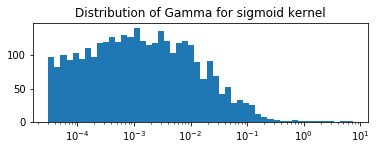

In [51]:
plot_log_hist(sigmoid_df['svc__gamma'], title='Distribution of Gamma for sigmoid kernel')

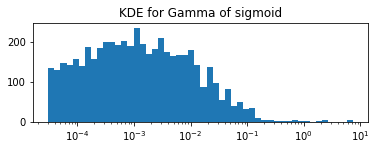

In [52]:
plot_log_hist(sci_sig_kde.rvs(5000), title='KDE for Gamma of sigmoid')

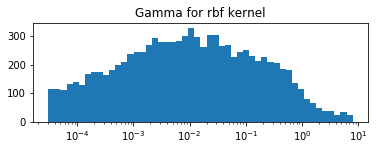

In [53]:
plot_log_hist(rbf_df['svc__gamma'], title='Gamma for rbf kernel')

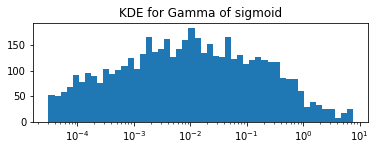

In [54]:
plot_log_hist(sci_rbf_kde.rvs(5000), title='KDE for Gamma of sigmoid')

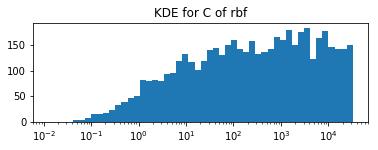

In [55]:
plot_log_hist(sci_Crbf_kde.rvs(5000), title='KDE for C of rbf')

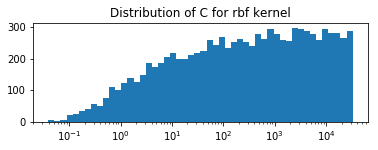

In [56]:
plot_log_hist(rbf_df['svc__C'], title='Distribution of C for rbf kernel')

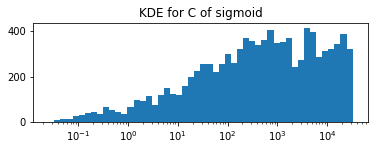

In [57]:
plot_log_hist(sci_Csig_kde.rvs(10000), title='KDE for C of sigmoid')

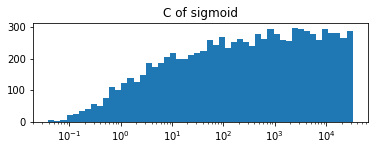

In [58]:
plot_log_hist(rbf_df['svc__C'], title='C of sigmoid')

####  As we can see above the fitted KDEs match the actual distributions quite well

## OpenML data

In [59]:
import warnings
warnings.filterwarnings("ignore") 


import openml
#import arff
from sklearn import preprocessing, tree, pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import VarianceThreshold
#import ConfigSpace
import importlib





In [60]:
#isolate task by number
task = openml.tasks.get_task(31)

#Get Dataset of the task
dataset = task.get_X_and_y()



In [61]:
task_id = list(df.task_id.unique())
kde_score = []
uni_score = []




In [78]:
import warnings
warnings.filterwarnings("ignore") 

task = openml.tasks.get_task(31)

dataset = task.get_X_and_y()

X = dataset[0]
y = dataset[1]





nominal_indices = task.get_dataset().get_features_by_type('nominal', [task.target_name])

numeric_indices = task.get_dataset().get_features_by_type('numeric', [task.target_name])

numeric_transformer = make_pipeline(
    Imputer(),
    StandardScaler())

# note that the dataset is encoded numerically, hence we can only impute
# numeric values, even for the categorical columns. 
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-1),
    OneHotEncoder(handle_unknown='ignore'))

transformer = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_indices),
        ('nominal', categorical_transformer, nominal_indices)],
    remainder='passthrough')



clf = make_pipeline(transformer, VarianceThreshold(), SVC())


kde = uniform(loc=1, scale = 10)


param_dist_kernel = {
    'svc__gamma' : sci_sig_kde,
    'svc__kernel': ['sigmoid']
}

param_dist_uniform = {
    'svc__gamma' : loguni(low = np.log10(min(sigmoid_df['svc__gamma'])), high = np.log10(max(sigmoid_df['svc__gamma'])), base = 10) ,
    'svc__kernel': ['sigmoid']
}




rs_kernel = RandomizedSearchCV(
  estimator=clf,
  param_distributions = param_dist_kernel,
  n_iter=20,
    return_train_score = True
)

rs_uniform = RandomizedSearchCV(
  estimator=clf,
  param_distributions = param_dist_uniform,
  n_iter=20,
    return_train_score = True
)



k_score = cross_val_score(X=X, y=y, cv = 4, estimator=rs_kernel)
u_score = cross_val_score(X=X, y=y, cv = 4, estimator = rs_uniform)

kde_score.append(np.mean(k_score))
uni_score.append(np.mean(u_score))

In [85]:
from sklearn import __version__ as v
print('The scikit-learn version is {}.'.format(v))

The scikit-learn version is 0.20.1.


In [21]:
final = pd.DataFrame(columns=['task_id', 'kde_score', 'uni_score'])

In [22]:
writer = pd.ExcelWriter('kde_vs_uni.xlsx')
final.to_excel(writer,'sigmoid')
#df2.to_excel(writer,'Sheet2')
writer.save()

# Comparing the performance of Uniform Vs KDE

In [3]:
sig_eval = pd.read_excel("kde_vs_uni3.xlsx")
rbf_eval = pd.read_excel("kde_vs_uni4.xlsx")

In [8]:
sig_eval

,task_id,kde_score,uni_score
0,3567,0.794073,0.792882
1,3561,0.675595,0.678571
2,3560,0.193223,0.204626
3,3549,0.995232,0.991683
4,3543,0.991967,0.995968
5,3512,0.993333,0.995000
6,3510,0.939162,0.941769
7,3494,0.963925,0.981962
8,3493,0.743337,0.869919
9,3492,0.746351,0.862008


In [6]:
np.mean(sig_eval.kde_score - sig_eval.uni_score)

-0.012219389661791261

In [7]:
np.mean(rbf_eval.kde_score - rbf_eval.uni_score)

1.9759652194826067e-05